# Hierarchical Clustering

##### By creating Vector space model and the dendogram representation to determine number of clusters for hierarchical clustering using single, average and complete linkage

 Abhishek Satapathy | 17BCE1326

### Import necessary libraries

In [51]:
import re
import porter
from numpy import zeros,dot
from nltk.stem import PorterStemmer
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [39]:
__all__=['compare']

stop_words = [ 'i', 'in', 'a', 'to', 'the', 'it', 'have', 'haven\'t', 'was', 'but', 'is', 'be', 'from' ]

splitter=re.compile ( "[a-z\-']+", re.I )
stemmer=PorterStemmer()

The below function adds a word the dictionary for words/count
First checks for stop words 
Then converts word to stemmed version

In [40]:
def add_word(word,d):
 w=word.lower() 
 if w not in stop_words:
  ws=stemmer.stem(w)
  d.setdefault(ws,0)
  d[ws] += 1

Creates Document vector and removes stopwords and applies stemming

In [41]:
def doc_vec(doc,key_idx):
 v=zeros(len(key_idx))
 for word in splitter.findall(doc):
  keydata=key_idx.get(stemmer.stem(word).lower(), None)
  if keydata: v[keydata[0]] = 1
 return v

# Vector Space Model

Computes vector space model using cosine similarity

In [42]:
def compare(doc1,doc2):

 # strip all punctuation but - and '
 # convert to lower case
 # store word/occurance in dict
 all_words=dict()

 for dat in [doc1,doc2]:
  [add_word(w,all_words) for w in splitter.findall(dat)]
 
 # build an index of keys so that we know the word positions for the vector
 key_idx=dict() # key-> ( position, count )
 keys=list(all_words.keys())
 sorted(keys)
 #print keys
 for i in range(len(keys)):
  key_idx[keys[i]] = (i,all_words[keys[i]])
 del keys
 del all_words

 v1=doc_vec(doc1,key_idx)
 v2=doc_vec(doc2,key_idx)
 return float(dot(v1,v2) / (norm(v1) * norm(v2)))

## Similarity index of all pairs of documents

In [60]:
docs = []
similarity_matrix = []

for i in range(1,10):
    doc = open("./docs/doc"+str(i)+".txt").read()
    docs.append(doc)

for i in range(len(docs)):
    score=[]
    for j in range(i,len(docs)):
        print("Using Doc1: %s\n\nUsing Doc2: %s\n" % ( docs[i], docs[j] ))
        s = float(compare(docs[i],docs[j]))
        score.append(s)
        print("Similarity %s\n----------------------------------\n" % s)
    similarity_matrix.append(score)

Using Doc1: Electric automotive maker Tesla Inc. is likely to introduce its products in India sometime in the summer of 2017.

Using Doc2: Electric automotive maker Tesla Inc. is likely to introduce its products in India sometime in the summer of 2017.

Similarity 1.0000000000000002
----------------------------------

Using Doc1: Electric automotive maker Tesla Inc. is likely to introduce its products in India sometime in the summer of 2017.

Using Doc2: Automotive major Mahindra likely to introduce driverless cars

Similarity 0.3144854510165755
----------------------------------

Using Doc1: Electric automotive maker Tesla Inc. is likely to introduce its products in India sometime in the summer of 2017.

Using Doc2: BMW plans to introduce its own motorcycles in india

Similarity 0.3144854510165755
----------------------------------

Using Doc1: Electric automotive maker Tesla Inc. is likely to introduce its products in India sometime in the summer of 2017.

Using Doc2: Just drive, a s

In [57]:
similarity_matrix

[[1.0000000000000002,
  0.3144854510165755,
  0.3144854510165755,
  0.0,
  0.12403473458920847,
  0.0,
  0.19611613513818402,
  0.0,
  0.0],
 [0.9999999999999999,
  0.14285714285714285,
  0.10482848367219183,
  0.16903085094570328,
  0.1091089451179962,
  0.0,
  0.2182178902359924,
  0.0],
 [0.9999999999999999, 0.0, 0.0, 0.0, 0.26726124191242434, 0.0, 0.0],
 [1.0000000000000002, 0.0, 0.08006407690254358, 0.0, 0.24019223070763074, 0.0],
 [0.9999999999999998, 0.0, 0.0, 0.0, 0.0],
 [1.0000000000000002,
  0.10206207261596574,
  0.08333333333333334,
  0.1091089451179962],
 [0.9999999999999998, 0.0, 0.13363062095621217],
 [1.0000000000000002, 0.0],
 [0.9999999999999999]]

## Dendogram

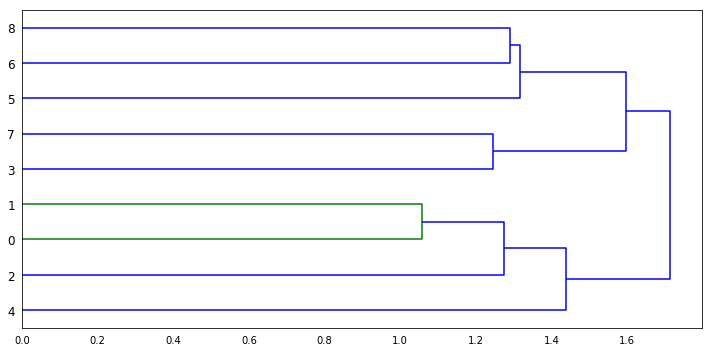

In [67]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(10, 5)) # set size
ax = dendrogram(linkage_matrix, orientation="right");

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='false',      # ticks along the bottom edge are off
    top='false',         # ticks along the top edge are off
    labelbottom='true')

plt.tight_layout() #show plot with tight layout


## Clustering

#### Single Linkage

In [89]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='single')
model.fit(linkage_matrix)
labels = model.labels_

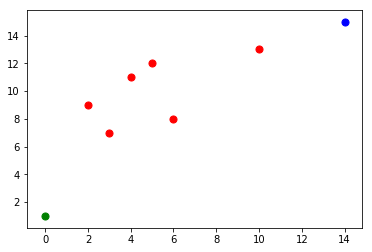

In [90]:
plt.scatter(linkage_matrix[labels==0, 0], linkage_matrix[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(linkage_matrix[labels==1, 0], linkage_matrix[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(linkage_matrix[labels==2, 0], linkage_matrix[labels==2, 1], s=50, marker='o', color='green')
# plt.scatter(linkage_matrix[labels==3, 0], linkage_matrix[labels==3, 1], s=50, marker='o', color='purple')
# plt.scatter(linkage_matrix[labels==4, 0], linkage_matrix[labels==4, 1], s=50, marker='o', color='orange')
# plt.scatter(linkage_matrix[labels==5, 0], linkage_matrix[labels==5, 1], s=50, marker='o', color='black')
# plt.scatter(linkage_matrix[labels==6, 0], linkage_matrix[labels==6, 1], s=50, marker='o', color='cyan')
plt.show()

#### Average Linkage

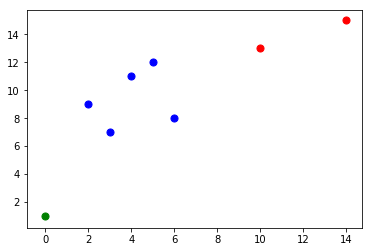

In [91]:
model = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='average')
model.fit(linkage_matrix)
labels = model.labels_

plt.scatter(linkage_matrix[labels==0, 0], linkage_matrix[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(linkage_matrix[labels==1, 0], linkage_matrix[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(linkage_matrix[labels==2, 0], linkage_matrix[labels==2, 1], s=50, marker='o', color='green')
# plt.scatter(linkage_matrix[labels==3, 0], linkage_matrix[labels==3, 1], s=50, marker='o', color='purple')
# plt.scatter(linkage_matrix[labels==4, 0], linkage_matrix[labels==4, 1], s=50, marker='o', color='orange')
# plt.scatter(linkage_matrix[labels==5, 0], linkage_matrix[labels==5, 1], s=50, marker='o', color='black')
# plt.scatter(linkage_matrix[labels==6, 0], linkage_matrix[labels==6, 1], s=50, marker='o', color='cyan')
plt.show()

#### Complete Linkage

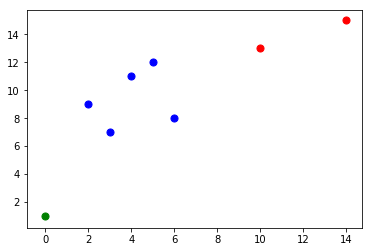

In [92]:
model = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='complete')
model.fit(linkage_matrix)
labels = model.labels_

plt.scatter(linkage_matrix[labels==0, 0], linkage_matrix[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(linkage_matrix[labels==1, 0], linkage_matrix[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(linkage_matrix[labels==2, 0], linkage_matrix[labels==2, 1], s=50, marker='o', color='green')
# plt.scatter(linkage_matrix[labels==3, 0], linkage_matrix[labels==3, 1], s=50, marker='o', color='purple')
# plt.scatter(linkage_matrix[labels==4, 0], linkage_matrix[labels==4, 1], s=50, marker='o', color='orange')
# plt.scatter(linkage_matrix[labels==5, 0], linkage_matrix[labels==5, 1], s=50, marker='o', color='black')
# plt.scatter(linkage_matrix[labels==6, 0], linkage_matrix[labels==6, 1], s=50, marker='o', color='cyan')
plt.show()